In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.colors import NoNorm
from matplotlib.colors import Normalize
import mat73
from mpl_toolkits.axes_grid1 import make_axes_locatable

Datos simulacion

In [2]:
tsim=100;
lapso=113;
pfinal=5650;
paso=(tsim*lapso)/(pfinal);
last=pfinal/lapso;
vthe = 0.1;
vthi = 0.02;
dx=0.1;
simulacion=1;
b_0=[1,2,4];
rangex=[10,14,19,23];
nombre_carpetas='/Sim';

dirdatos='/run/media/dokalozu/Nuevo vol/Simulaciones';
dirparticulas=dirdatos+'/Particulas';
dircampos=dirdatos+'/Campos';
dirgraficas='/home/dokalozu/Plasma/Graficas';
dirfase=dirgraficas+'/Diagramas de fase';
dirdistribucion=dirgraficas+'/Funciones de distribucion';

In [3]:
def detsim(simulacion,b_0,rangex):
    if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
        b=b_0[0]
    elif simulacion==2 or simulacion==5 or simulacion==8 or simulacion==11:
        b=b_0[1]
    elif simulacion==3 or simulacion==6 or simulacion==9 or simulacion==12:
        b=b_0[2]

    if simulacion==1 or simulacion==2 or simulacion==3:
        yrange=rangex[0];
    elif simulacion==4 or simulacion==5 or simulacion==6:
        yrange=rangex[1];
    elif simulacion==7 or simulacion==8 or simulacion==9:
        yrange=rangex[2];
    elif simulacion==10 or simulacion==11 or simulacion==12:
        yrange=rangex[3];
    return b, yrange

def subgraf (link,sunfig,ind, ba,xge,yge):
    mat = mat73.loadmat(link)
    iparticle = mat["iparticle"]
    eparticle = mat["eparticle"]
    pxe = np.array(list(eparticle[0:]), dtype=float)
    puxe = np.array(list(eparticle[3:]), dtype=float)
    pox=pxe[0,0,:];
    vpe=puxe[0,0,:];
    x_data=pox/0.1  # Replace with your x-coordinate data
    y_data = vpe/0.1
    sunfig.set_title(r"t="+str((ind*2)/ba)+r"$\omega_{pe}^{-1}$ ",fontsize=14,weight="bold")
    l0=sunfig.hist2d(x_data,y_data, bins =[xge, yge],cmap=plt.cm.seismic)
    f=sunfig;
    return f, l0

def subgraf2 (link,sunfig,ind, ba,xge,yge,simulacion,status):
    vnorm=0.1;
    x_range = (0, xge);  # Set the range for the x-axis
    y_range = (-yge, yge); # Set the range for the y-axis
    mat = mat73.loadmat(link)
    eparticle = mat["eparticle"]
    if status==0:
        pxe = np.array(list(eparticle[0:]), dtype=float)
        puxe = np.array(list(eparticle[3:]), dtype=float)
    elif status==1:
        pxe = np.array(list(eparticle[1:]), dtype=float)
        puxe = np.array(list(eparticle[4:]), dtype=float)
    pox=pxe[0,0,:];
    vpe=puxe[0,0,:];
    x_data=pox/vnorm  # Replace with your x-coordinate data
    y_data = vpe/vnorm
    sunfig.set_title(r"t="+str((ind*2)/ba)+r"$\omega_{pe}^{-1}$ ",fontsize=14,weight="bold")
    
    if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
        l0=sunfig.hist2d(x_data,y_data, bins =(250, 250),cmap=plt.cm.seismic,range=[x_range, y_range],norm=Normalize(vmin=0, vmax=500))
    elif simulacion==2 or simulacion==5 or simulacion==8 or simulacion==11:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.BrBG,range=[x_range, y_range],norm=Normalize(vmin=0, vmax=500))
    elif simulacion==3 or simulacion==6 or simulacion==9 or simulacion==12:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.PuOr,range=[x_range, y_range],norm=Normalize(vmin=0, vmax=500))
    f=sunfig;
    return f, l0

def subgraf3log (link,sunfig,ind, ba,xge,yge,simulacion,status):
    vnorm=0.1;
    x_range = (0, xge);  # Set the range for the x-axis
    y_range = (-yge, yge); # Set the range for the y-axis
    mat = mat73.loadmat(link)
    eparticle = mat["eparticle"]
    if status==0:
        pxe = np.array(list(eparticle[0:]), dtype=float)
        puxe = np.array(list(eparticle[3:]), dtype=float)
    elif status==1:
        pxe = np.array(list(eparticle[1:]), dtype=float)
        puxe = np.array(list(eparticle[4:]), dtype=float)
    pox=pxe[0,0,:];
    vpe=puxe[0,0,:];
    x_data=pox/vnorm  # Replace with your x-coordinate data
    y_data = vpe/vnorm
    sunfig.set_title(r"t="+str((ind*2)/ba)+r"$\omega_{pe}^{-1}$ ",fontsize=14,weight="bold")
    
    if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
        l0=sunfig.hist2d(x_data,y_data, bins =(250, 250),cmap=plt.cm.seismic,range=[x_range, y_range],norm=LogNorm(vmin=1, vmax=1300))
    elif simulacion==2 or simulacion==5 or simulacion==8 or simulacion==11:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.BrBG,range=[x_range, y_range],norm=LogNorm(vmin=1, vmax=1300))
    elif simulacion==3 or simulacion==6 or simulacion==9 or simulacion==12:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.PuOr,range=[x_range, y_range],norm=LogNorm(vmin=1, vmax=1300))
    f=sunfig;
    return f, l0

def subdist2 (link,sunfig,ind,ba,xge,yge,simulacion,status):
    x_range = (-xge, xge);  # Set the range for the x-axis
    y_range = (-yge, yge); # Set the range for the y-axis
    mat = mat73.loadmat(link)
    if status==0:
        vnorm=0.1;
        particledata = mat['eparticle']
        pux = np.array(list(particledata[3:]), dtype=float)
        puy = np.array(list(particledata[4:]), dtype=float)
    elif status==1:
        vnorm=0.02;
        particledata = mat['iparticle']
        pux = np.array(list(particledata[3:]), dtype=float)
        puy = np.array(list(particledata[4:]), dtype=float)
    vpar=pux[0,0,:];
    vper=puy[0,0,:];
    x_data = vpar/vnorm ; # Replace with your x-coordinate data
    y_data = vper/vnorm;  # Replace with your y-coordinate data
    sunfig.set_title(r"t="+str((ind*2)/ba)+r"$\omega_{pe}^{-1}$ ",fontsize=14,weight="bold")
    
    if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
        l0=sunfig.hist2d(x_data,y_data, bins =(250, 250),cmap=plt.cm.seismic,range=[x_range, y_range], norm=LogNorm(vmin=10, vmax=1000))
    elif simulacion==2 or simulacion==5 or simulacion==8 or simulacion==11:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.BrBG,range=[x_range, y_range], norm=LogNorm(vmin=10, vmax=1000))
    elif simulacion==3 or simulacion==6 or simulacion==9 or simulacion==12:
        l0=sunfig.hist2d(x_data,y_data, bins =(250,250),cmap=plt.cm.PuOr,range=[x_range, y_range], norm=LogNorm(vmin=10, vmax=1000))
    f=sunfig;
    return f, l0

def subdisteinv (link,sunfig,ind,ba,yge,xge):
    vnorm=0.1;
    mat = mat73.loadmat(link)
    particledata = mat['eparticle']
    pux = np.array(list(particledata[3:]), dtype=float)
    puy = np.array(list(particledata[4:]), dtype=float)
    vpar=pux[0,0,:];
    vper=puy[0,0,:];
    x_data=vpar/vnorm ; # Replace with your x-coordinate data
    y_data = vper/vnorm;  # Replace with your y-coordinate data
    x_range = (-yge, yge);  # Set the range for the x-axis
    y_range = (-xge, xge); # Set the range for the y-axis
    # Create a 2D histogram plot with specified ranges
    sunfig.set_title(r"t="+str((ind*2)/ba)+r"$\omega_{pe}^{-1}$ ",fontsize=14,weight="bold")
    l0=sunfig.hist2d(y_data, x_data, bins=(100, 100), cmap=plt.cm.seismic,norm=LogNorm(), range=[x_range, y_range]);
    f=sunfig;
    return f, l0

Diagrama de fase multiple

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/run/media/dokalozu/Nuevo vol/Simulaciones\sim7/7particlesim113.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

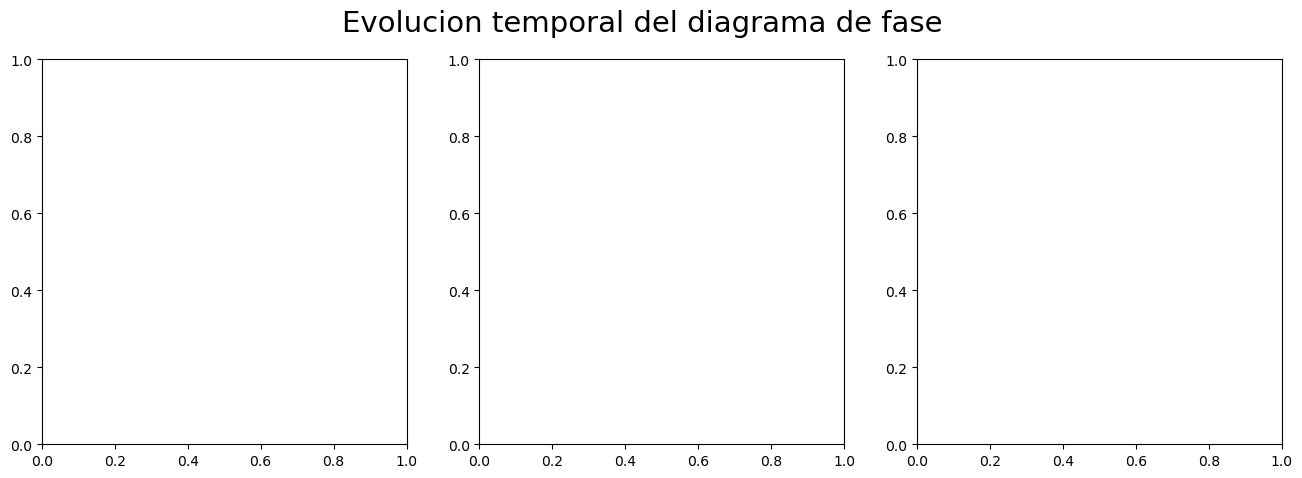

In [14]:
simulacion=7;
xrange = 128;
yrange=12;
yrangi=6; 
time=10;
indices = [1,24,49]

b, yrange = detsim(simulacion, b_0, rangex);

fig, ax=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Evolucion temporal del diagrama de fase',fontsize=21)

for i in range (0,3):
    ind=indices[i];
    destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
    ax[i], l01=subgraf2(destino,ax[i],ind,b,xrange,yrange,simulacion,1);

divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="7%", pad=0.1)
cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
ax[2].set_xlabel(r'$x \ [\lambda_{d}]$',fontsize=18)
ax[0].set_ylabel(r'$V_{xe}/V_{the}$',fontsize=18)
fig.tight_layout()

### Funcion de distribucion multiple

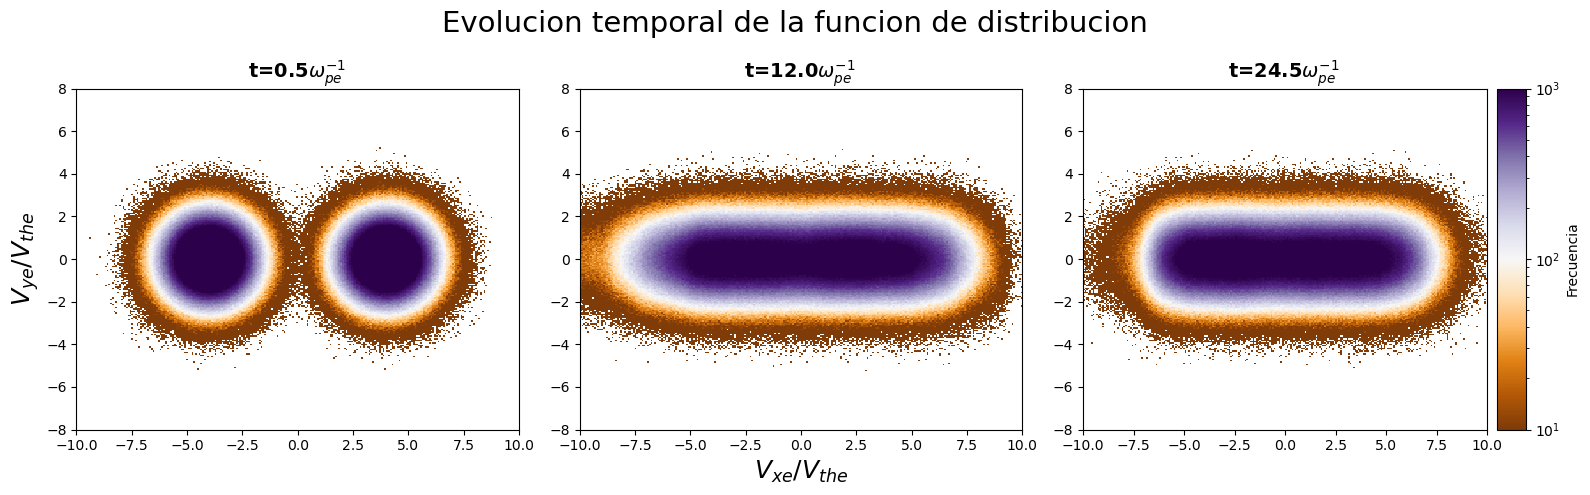

In [6]:
simulacion=6;
rangx=10;
rangy=8;
status=0;
indices = [1,24,49]

b, yrange = detsim(simulacion, b_0, rangex);

fig, ax=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Evolucion temporal de la funcion de distribucion',fontsize=21)

for i in range (0,3):
    ind=indices[i];
    destino=dirparticulas+'/sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
    ax[i], l01=subdist2(destino,ax[i],ind,b,rangx,rangy,simulacion,status);

divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="7%", pad=0.1)
cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
ax[1].set_xlabel(r'$V_{xe}/V_{the}$',fontsize=18)
ax[0].set_ylabel(r'$V_{ye}/V_{the}$',fontsize=18)
fig.tight_layout()

Grafica de evolucion temporal (5 pasos)

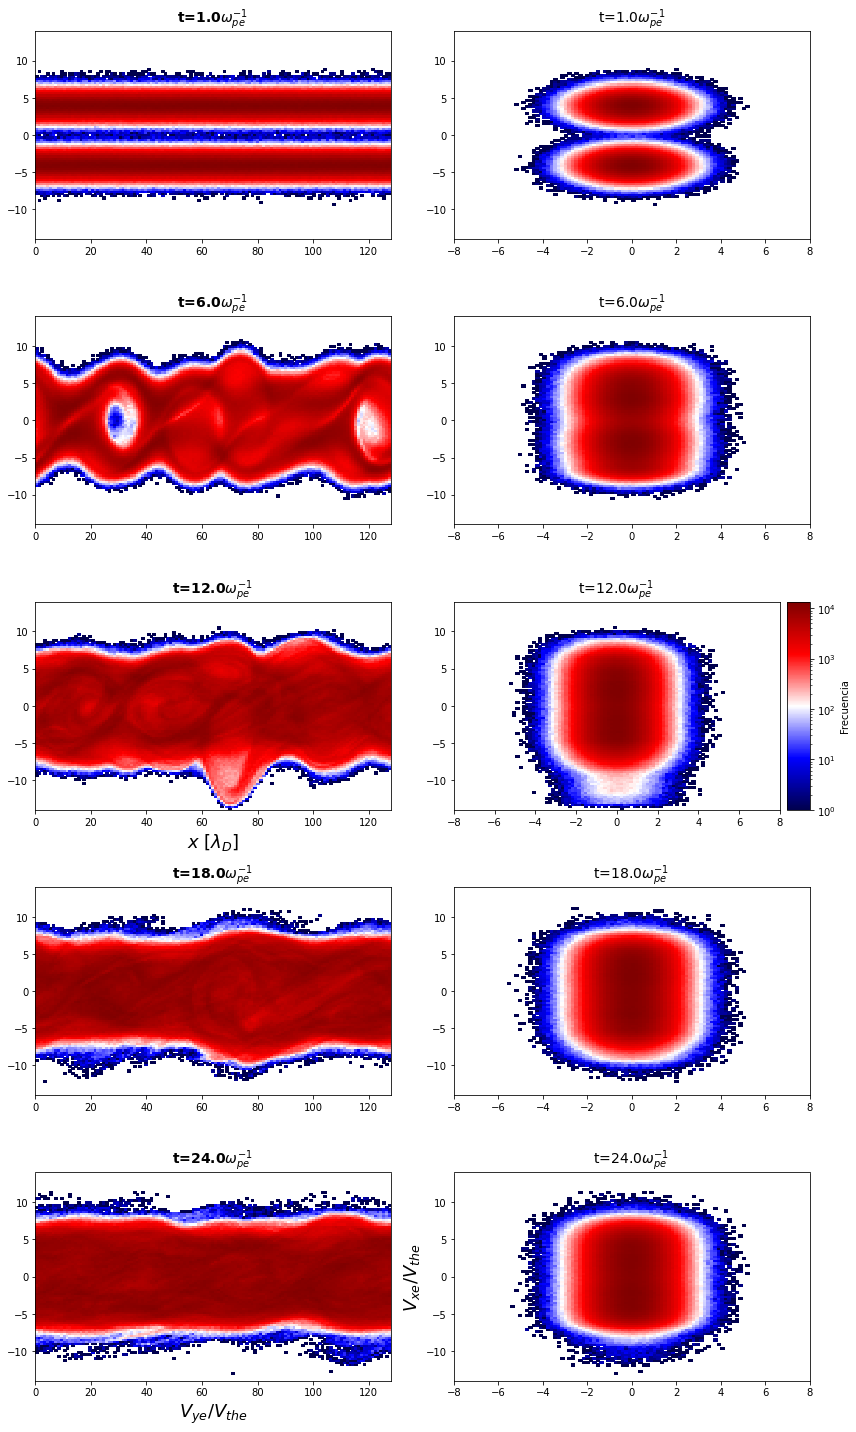

In [12]:
simulacion=6;
rangx=8;
xrange=128;
yrange=12;
yrangi=6; 
time=10;
i=0;

paso2=(2*tsim*lapso)/(pfinal);

b, yrange=detsim(simulacion,b_0,rangex);

destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(i+1))+'.mat';
xgrid_e = np.linspace(0,xrange,xrange)
ygrid_e = np.linspace(-yrange,yrange,100)

xgrid_i = np.linspace(0,xrange,xrange)
ygrid_i = np.linspace(-yrangi,yrangi,100)


fig, ax=plt.subplots(5,2,figsize=[12,20])
#fig.suptitle('Evolucion temporal diagrama de fase y funcion de distribucion',fontsize=21)


for i in range (0,5):
    destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(i+1))+'.mat';
    if i==0:
        ind=2;
        destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(i+1))+'.mat';
        ax[i,0], l01=subgraf2(destino,ax[i,0],ind,b,rangx,rangy,simulacion,status);
        ax[i,1], l01=subdisteinv(destino,ax[i,1],ind,b,rangx,yrange);
    elif i>0:
        ind=i*12;
        destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
        ax[i,0], l02=subgraf2(destino,ax[i,0],ind,b,rangx,rangy,simulacion,status);
        ax[i,1], l02=subdisteinv(destino,ax[i,1],ind,b,rangx,yrange);


divider = make_axes_locatable(ax[2,1])
cax = divider.append_axes("right", size="7%", pad=0.1)
cbar = plt.colorbar(l02[3], cax=cax, orientation='vertical', label='Frecuencia')
ax[2,0].set_xlabel(r'$x \ [\lambda_{D}]$',fontsize=18)
ax[4,0].set_xlabel(r'$V_{ye}/V_{the}$',fontsize=18)
ax[4,1].set_ylabel(r'$V_{xe}/V_{the}$',fontsize=18)
fig.tight_layout()

## Multi Espacio de fase parcial (campo magnetico)

In [17]:
destino=dirparticulas+'/sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
mat=mat73.loadmat(destino)

10


KeyboardInterrupt: 

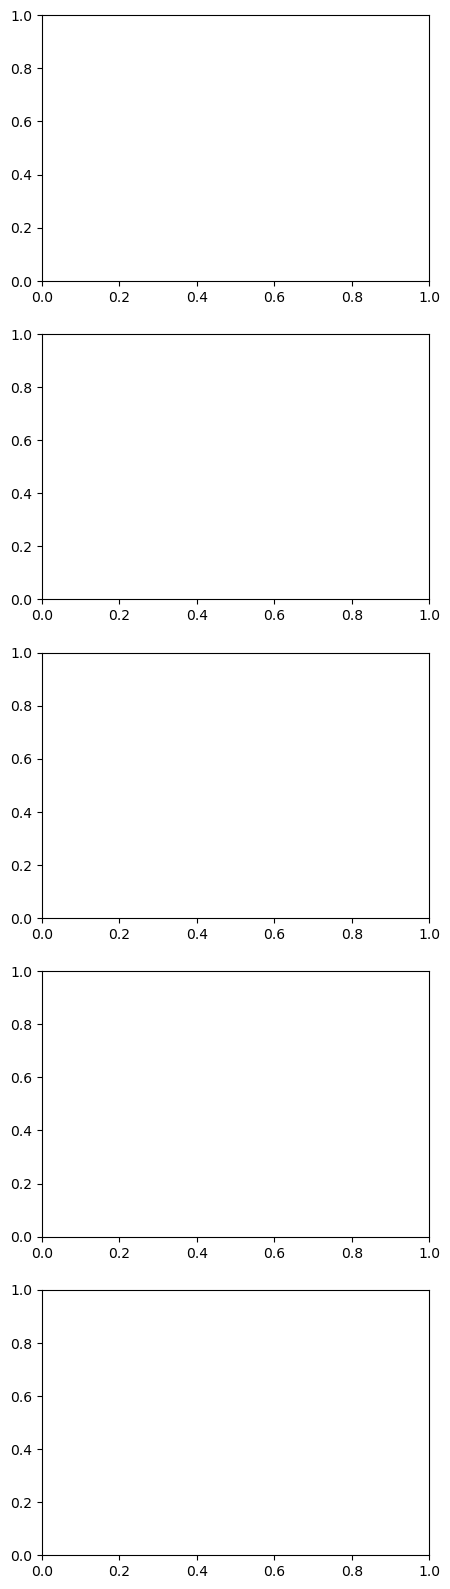

In [42]:
#simulacion=6;
rangx=8;
xrange=128;
yrange=12;
yrangi=6; 
time=10;
limit=12;
begining=10;
posy=0;
estado=1;

if begining==1:
    v='2';
elif begining==4:
    v='4';
elif begining==7:
    v='8';
else:
    v='99';

rangex=[10,10,20,20];

paso2=(2*tsim*lapso)/(pfinal);

#if estado==0:
#    fig.suptitle('Diagrama de fase en X: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)
#else:
#    fig.suptitle('Diagrama de fase en Y: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)

for simulacion in range (begining,begining+3):
    print(simulacion);
    fig, ax=plt.subplots(5,1,figsize=[5,20])
    
    b, yrange=detsim(simulacion,b_0,rangex);
    #yrange = 7;

    #xgrid_e = (0, xrange);
    #ygrid_e = (-yrange, yrange);

    #xgrid_i = (0, xrange);
    #ygrid_i = (-yrangi, yrangi);

    for i in range (0,5):
        if i==0:
            ind=1;
        else:
            ind=i*limit;

        if estado==0:
            axs=ax[i];
            destino=dirparticulas+'/sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
            axs, l01=subgraf2(destino,axs,ind,b,xrange,yrange,simulacion,estado);
    
            divider = make_axes_locatable(ax[i])
            cax = divider.append_axes("right", size="7%", pad=0.1)
            cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
        #fig.text(0.5, 0.5, r"t="+str((ind*2)/b)+r"$\omega_{pe}^{-1}$ ", ha='center', fontsize=14)
    #posy+=1;
        else:
            axs=ax[i];
            destino=dirparticulas+'/sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
            axs, l01=subgraf3log(destino,axs,ind,b,xrange,yrange,simulacion,estado);
    
            divider = make_axes_locatable(ax[i])
            cax = divider.append_axes("right", size="7%", pad=0.1)
            cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
        #fig.text(0.5, 0.5, r"t="+str((ind*2)/b)+r"$\omega_{pe}^{-1}$ ", ha='center', fontsize=14)
    #posy+=1;

    if estado==0:
        if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
            ax[2].set_ylabel(r'$p_{xe}/m_{\alpha e} V_{the}$',fontsize=22)
        ax[4].set_xlabel(r'$x \ [\lambda_{D}]$',fontsize=22)
        fig.tight_layout()
        os.chdir(dirfase+'/Diagrama Multiple/X');
        plt.savefig('x'+str(b)+'fasev'+v)
    else:
        if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
            ax[2].set_ylabel(r'$p_{ye}/m_{\alpha e} V_{the}$',fontsize=22)
        ax[4].set_xlabel(r'$y \ [\lambda_{D}]$',fontsize=22)
        fig.tight_layout()
        os.chdir(dirfase+'/Diagrama Multiple/Y');
        plt.savefig('y'+str(b)+'fasev'+v)

### Multi funcion de distribucion parcial (Campo magnetico)

10
11
12


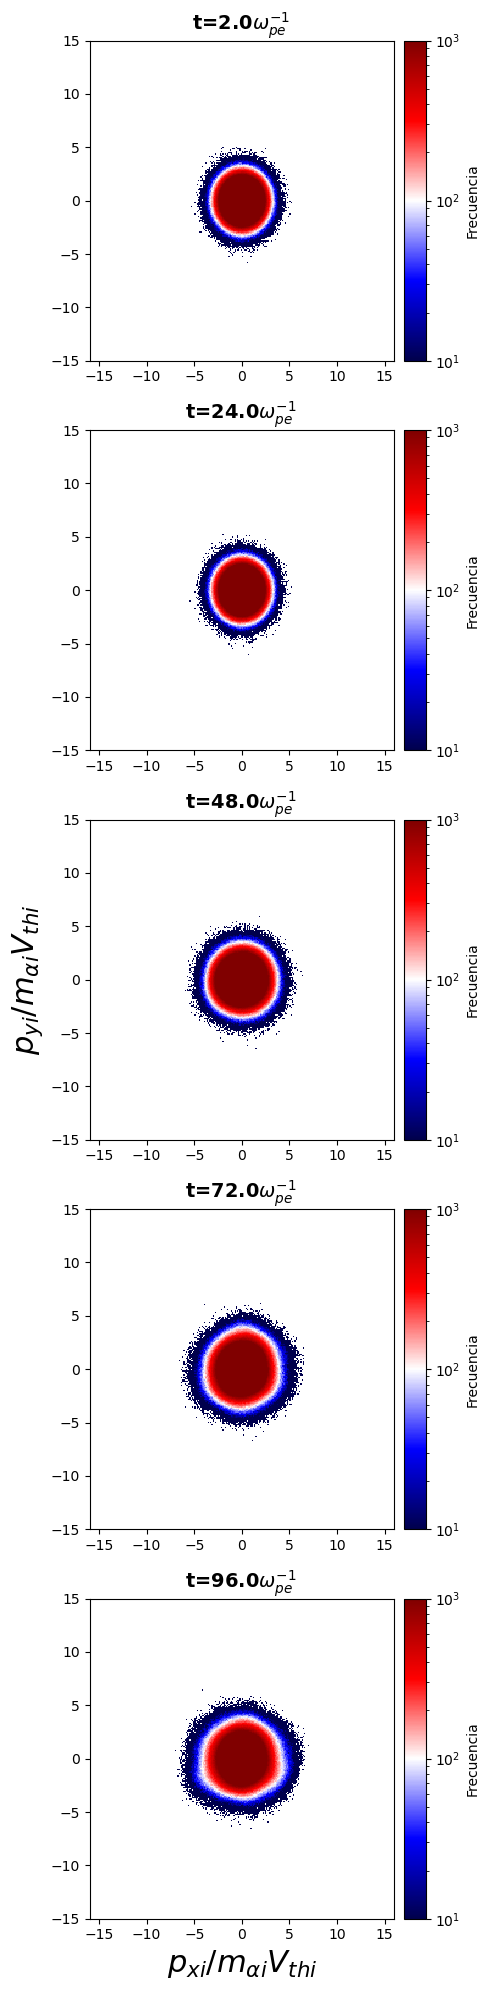

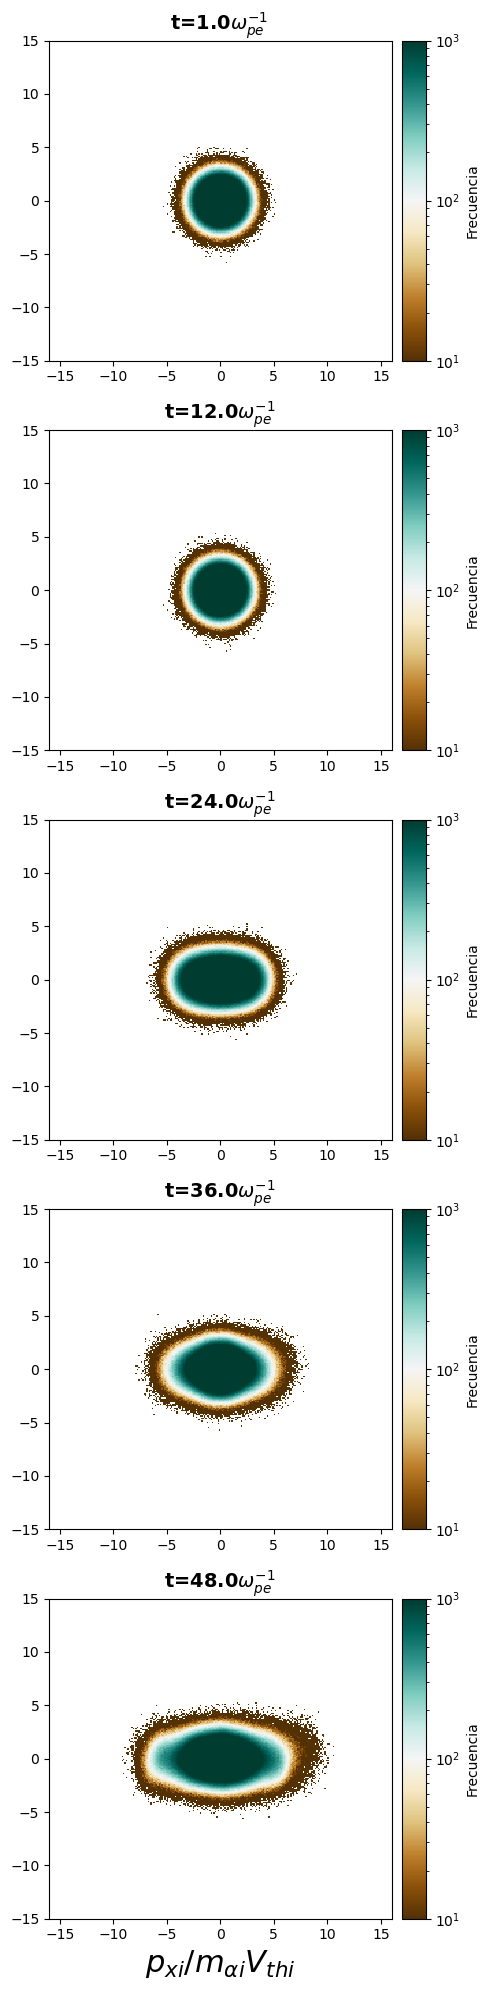

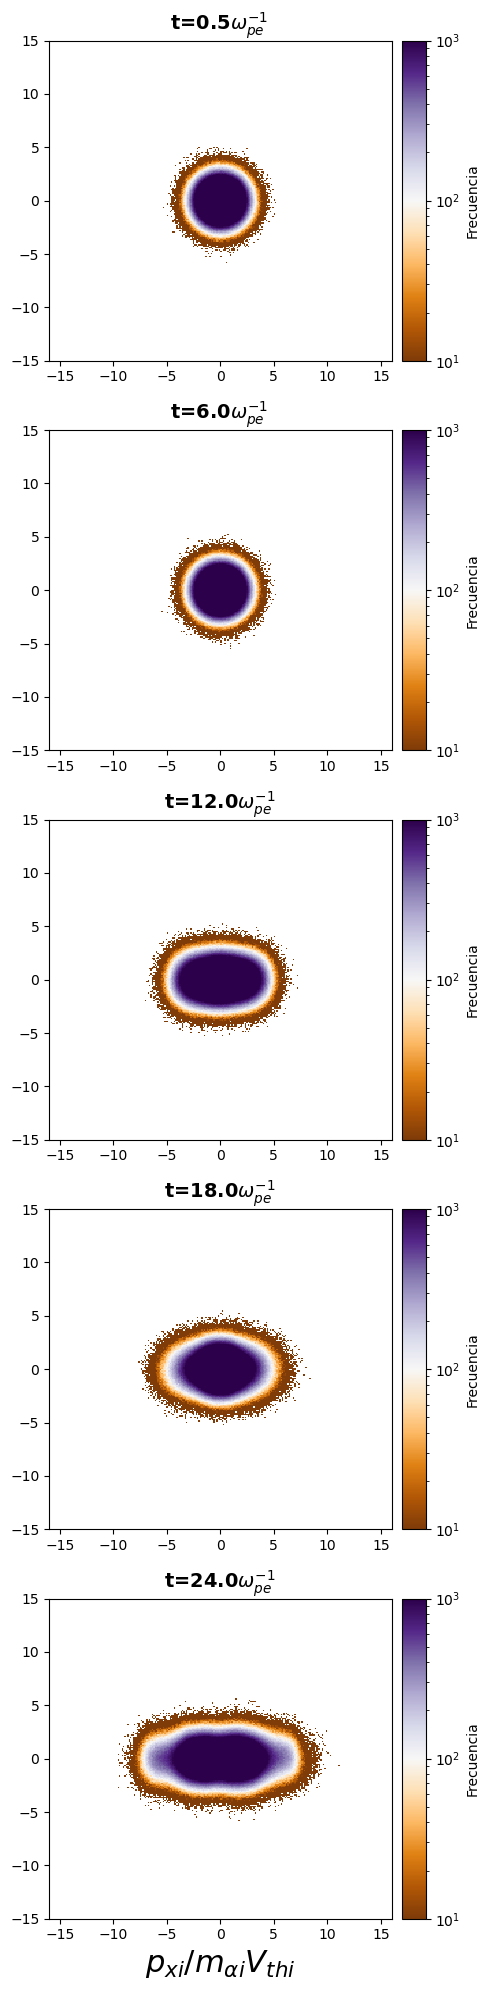

In [50]:
#simulacion=6;
rangx=8;
yrange=10;
ionspace=[8, 12, 16, 16]
yrangi=6; 
time=10;
limit=12;
begining=10;
posy=0;
estado=1;

if begining==1:
    v='2';
    yrange=10;
elif begining==4:
    v='4';
    yrange=12;
elif begining==7:
    v='8';
    yrange=15;
else:
    v='99';
    yrange=15;

#if estado==0:
#    fig.suptitle('Diagrama de fase en X: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)
#else:
#    fig.suptitle('Diagrama de fase en Y: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)

for simulacion in range (begining,begining+3):
    print(simulacion);
    

    fig, ax=plt.subplots(5,1,figsize=[5,20])
    
    b, xrange=detsim(simulacion,b_0,ionspace);

    for i in range (0,5):
        if i==0:
            ind=1;
        else:
            ind=i*limit;
        axs=ax[i];
        destino=dirparticulas+'/sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
        axs, l01=subdist2(destino,axs,ind,b,xrange,yrange,simulacion,estado);
    
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes("right", size="7%", pad=0.1)
        cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
        #fig.text(0.5, 0.5, r"t="+str((ind*2)/b)+r"$\omega_{pe}^{-1}$ ", ha='center', fontsize=14)
    #posy+=1;

    if estado==0:
        if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
            ax[2].set_ylabel(r'$p_{ye}/m_{\alpha e} V_{the}$',fontsize=22)
        ax[4].set_xlabel(r'$p_{xe}/m_{\alpha e} V_{the}$',fontsize=22)
        fig.tight_layout()
        os.chdir(dirdistribucion+'/Diagrama Multiple/Electron');
        plt.savefig('e'+v+'distb'+str(b))
    else:
        if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
            ax[2].set_ylabel(r'$p_{yi}/m_{\alpha i} V_{thi}$',fontsize=22)
        ax[4].set_xlabel(r'$p_{xi}/m_{\alpha i} V_{thi}$',fontsize=22)
        fig.tight_layout()
        os.chdir(dirdistribucion+'/Diagrama Multiple/Ion');
        plt.savefig('i'+v+'distb'+str(b))

## Multi Espacio de fase total (Campo magnetico)

1
2
3


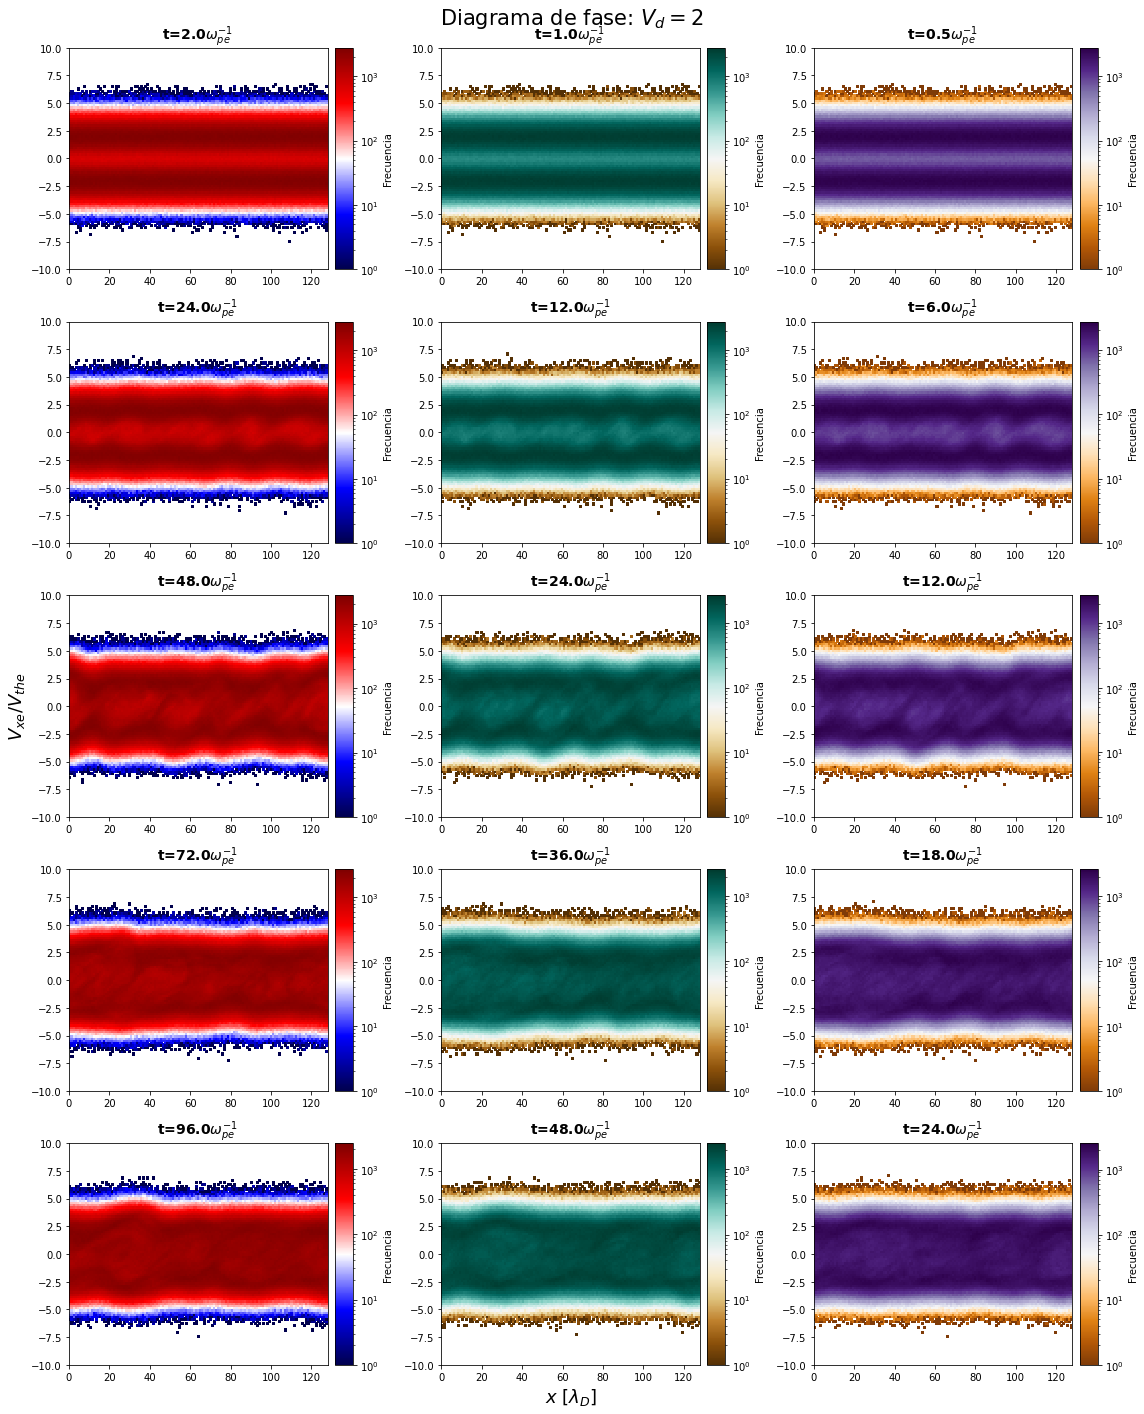

In [15]:
rangx=8;
xrange=128;
yrange=12;
yrangi=6; 
time=10;
limit=12;
begining=1
posy=0;
estado=0;

if begining==1:
    v='2';
elif begining==4:
    v='4';
elif begining==7:
    v='8';
else:
    v='9.9';

paso2=(tsim*lapso)/(pfinal);
fig, ax=plt.subplots(5,3,figsize=[16,20])
if estado==0:
    fig.suptitle('Diagrama de fase en X: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)
else:
    fig.suptitle('Diagrama de fase en Y: '+r'$V_{d}=$'+v+r'$V_{the}$',fontsize=21)

for simulacion in range (begining,begining+3):
    print(simulacion);
    if simulacion==1 or simulacion==4 or simulacion==7 or simulacion==10:
        b=b_0[0]
    elif simulacion==2 or simulacion==5 or simulacion==8 or simulacion==11:
        b=b_0[1]
    elif simulacion==3 or simulacion==6 or simulacion==9 or simulacion==12:
        b=b_0[2]

    if simulacion==1 or simulacion==2 or simulacion==3:
        yrange=rangex[0];
    elif simulacion==4 or simulacion==5 or simulacion==6:
        yrange=rangex[1];
    elif simulacion==7 or simulacion==8 or simulacion==9:
        yrange=rangex[2];
    elif simulacion==10 or simulacion==11 or simulacion==12:
        yrange=rangex[3];

    xgrid_e = np.linspace(0,xrange,xrange)
    ygrid_e = np.linspace(-yrange,yrange,100)

    xgrid_i = np.linspace(0,xrange,xrange)
    ygrid_i = np.linspace(-yrangi,yrangi,100)

    for i in range (0,5):
        if i==0:
            ind=1;
        else:
            ind=i*limit;
        axs=ax[i,posy];
        destino=dirdatos+'\sim'+str(simulacion)+'/'+str(simulacion)+'particlesim'+str(lapso*(ind))+'.mat';
        axs, l01=subgraf2(destino,axs,ind,b,xgrid_e,ygrid_e,simulacion,estado);
    
        divider = make_axes_locatable(ax[i,posy])
        cax = divider.append_axes("right", size="7%", pad=0.1)
        cbar = plt.colorbar(l01[3], cax=cax, orientation='vertical', label='Frecuencia')
        #fig.text(0.5, 0.5, r"t="+str((ind*2)/b)+r"$\omega_{pe}^{-1}$ ", ha='center', fontsize=14)
    posy+=1;

if estado==0:
    ax[4,1].set_xlabel(r'$x \ [\lambda_{D}]$',fontsize=22)
    ax[2,0].set_ylabel(r'$V_{xe}/V_{the}$',fontsize=22)
    fig.tight_layout()
    os.chdir(dirfase+'\Diagrama Multiple');
    plt.savefig('xfasev'+v)
else:
    ax[4,1].set_xlabel(r'$x \ [\lambda_{D}]$',fontsize=22)
    ax[2,0].set_ylabel(r'$V_{xi}/V_{thi}$',fontsize=22)
    fig.tight_layout()
    os.chdir(dirfase+'\Diagrama Multiple');
    plt.savefig('yfasev'+v)

array([[<AxesSubplot:title={'center':'Subplot 1'}>, <AxesSubplot:>],
       [<AxesSubplot:title={'center':'Subplot 2'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

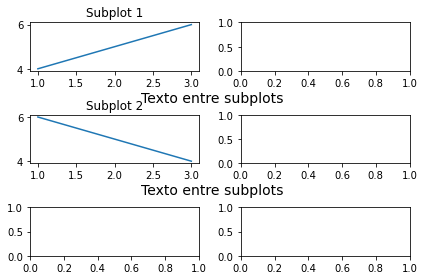

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2)

axs[0,0].plot([1, 2, 3], [4, 5, 6])
axs[0,0].set_title('Subplot 1')

axs[1,0].plot([1, 2, 3], [6, 5, 4])
axs[1,0].set_title('Subplot 2')

fig.text(0.5, 0.31, 'Texto entre subplots', ha='center', fontsize=14)
fig.text(0.5, 0.63, 'Texto entre subplots', ha='center', fontsize=14)
fig.tight_layout()
axs